In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
print(X_train.shape)

(784, 41000)


In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 10000)

Iteration:  0
[1 1 3 ... 1 8 1] [8 3 7 ... 7 8 2]
0.09017073170731707
Iteration:  10
[2 7 3 ... 7 3 3] [8 3 7 ... 7 8 2]
0.1895609756097561
Iteration:  20
[2 3 3 ... 7 3 3] [8 3 7 ... 7 8 2]
0.2845121951219512
Iteration:  30
[0 3 3 ... 7 3 3] [8 3 7 ... 7 8 2]
0.3547560975609756
Iteration:  40
[0 3 3 ... 7 4 3] [8 3 7 ... 7 8 2]
0.40175609756097563
Iteration:  50
[2 3 3 ... 7 4 3] [8 3 7 ... 7 8 2]
0.43673170731707317
Iteration:  60
[2 3 3 ... 7 4 3] [8 3 7 ... 7 8 2]
0.4661219512195122
Iteration:  70
[2 3 3 ... 7 4 3] [8 3 7 ... 7 8 2]
0.49029268292682926
Iteration:  80
[2 2 9 ... 7 4 3] [8 3 7 ... 7 8 2]
0.5118048780487805
Iteration:  90
[2 2 9 ... 7 4 0] [8 3 7 ... 7 8 2]
0.5326341463414634
Iteration:  100
[8 3 9 ... 7 4 0] [8 3 7 ... 7 8 2]
0.5566585365853659
Iteration:  110
[8 3 9 ... 7 4 0] [8 3 7 ... 7 8 2]
0.5807560975609756
Iteration:  120
[8 3 9 ... 7 4 0] [8 3 7 ... 7 8 2]
0.602780487804878
Iteration:  130
[8 3 7 ... 7 4 0] [8 3 7 ... 7 8 2]
0.6234634146341463
Iteration:  14

Iteration:  1160
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8851951219512195
Iteration:  1170
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8853658536585366
Iteration:  1180
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8857317073170732
Iteration:  1190
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8860975609756098
Iteration:  1200
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8864634146341464
Iteration:  1210
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8869024390243903
Iteration:  1220
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8875121951219512
Iteration:  1230
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8876829268292683
Iteration:  1240
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8879512195121951
Iteration:  1250
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8881951219512195
Iteration:  1260
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8883658536585366
Iteration:  1270
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8886341463414634
Iteration:  1280
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.8891463414634146
Iteration:  1290
[8 8 7 ... 7 4 2] [8 3 7 ... 7 8 2]
0.889585365

Iteration:  2310
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9089756097560976
Iteration:  2320
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9090975609756098
Iteration:  2330
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9091463414634147
Iteration:  2340
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9091951219512195
Iteration:  2350
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9092682926829269
Iteration:  2360
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9094390243902439
Iteration:  2370
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9096829268292683
Iteration:  2380
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9098048780487805
Iteration:  2390
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9099756097560976
Iteration:  2400
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9101219512195122
Iteration:  2410
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9102926829268293
Iteration:  2420
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9104390243902439
Iteration:  2430
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9104878048780488
Iteration:  2440
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.910560975

Iteration:  3460
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9198536585365854
Iteration:  3470
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9199024390243903
Iteration:  3480
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9199268292682927
Iteration:  3490
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9199756097560976
Iteration:  3500
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9200487804878049
Iteration:  3510
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9201463414634147
Iteration:  3520
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.920219512195122
Iteration:  3530
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9202682926829269
Iteration:  3540
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9203170731707317
Iteration:  3550
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9203170731707317
Iteration:  3560
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9204390243902439
Iteration:  3570
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9205853658536586
Iteration:  3580
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.920609756097561
Iteration:  3590
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.92070731707

Iteration:  4610
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9255853658536586
Iteration:  4620
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9256341463414635
Iteration:  4630
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9257317073170732
Iteration:  4640
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9257560975609757
Iteration:  4650
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9258048780487805
Iteration:  4660
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9259024390243903
Iteration:  4670
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.926
Iteration:  4680
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9260487804878049
Iteration:  4690
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9261463414634147
Iteration:  4700
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.926219512195122
Iteration:  4710
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9263902439024391
Iteration:  4720
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.926439024390244
Iteration:  4730
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9264634146341464
Iteration:  4740
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9265365853658537
Iterati

Iteration:  5760
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9309512195121952
Iteration:  5770
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9309024390243903
Iteration:  5780
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9309756097560976
Iteration:  5790
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9309756097560976
Iteration:  5800
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.931
Iteration:  5810
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9309512195121952
Iteration:  5820
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.931
Iteration:  5830
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.931
Iteration:  5840
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9310243902439025
Iteration:  5850
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9310731707317074
Iteration:  5860
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9311219512195122
Iteration:  5870
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9311219512195122
Iteration:  5880
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9311463414634147
Iteration:  5890
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9312439024390244
Iteration:  5900
[8 8 7 ... 7 8

Iteration:  6910
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9340487804878049
Iteration:  6920
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9340731707317074
Iteration:  6930
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9341219512195122
Iteration:  6940
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9340975609756098
Iteration:  6950
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9341219512195122
Iteration:  6960
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9340975609756098
Iteration:  6970
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9341463414634147
Iteration:  6980
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9341463414634147
Iteration:  6990
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9341707317073171
Iteration:  7000
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.934219512195122
Iteration:  7010
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.934219512195122
Iteration:  7020
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.934219512195122
Iteration:  7030
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9341951219512196
Iteration:  7040
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.934243902439

Iteration:  8060
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361951219512196
Iteration:  8070
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361951219512196
Iteration:  8080
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361951219512196
Iteration:  8090
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361951219512196
Iteration:  8100
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361707317073171
Iteration:  8110
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361951219512196
Iteration:  8120
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.936219512195122
Iteration:  8130
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361707317073171
Iteration:  8140
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9361951219512196
Iteration:  8150
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9362439024390244
Iteration:  8160
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9362439024390244
Iteration:  8170
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9362926829268293
Iteration:  8180
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9363170731707318
Iteration:  8190
[8 8 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9363414634

Iteration:  9200
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9385365853658536
Iteration:  9210
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9385365853658536
Iteration:  9220
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9386585365853658
Iteration:  9230
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9386829268292682
Iteration:  9240
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9386829268292682
Iteration:  9250
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9387317073170731
Iteration:  9260
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9387560975609756
Iteration:  9270
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9388048780487804
Iteration:  9280
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9388292682926829
Iteration:  9290
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9388048780487804
Iteration:  9300
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9388536585365853
Iteration:  9310
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9389024390243902
Iteration:  9320
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.9389512195121951
Iteration:  9330
[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.938975609

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def train_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


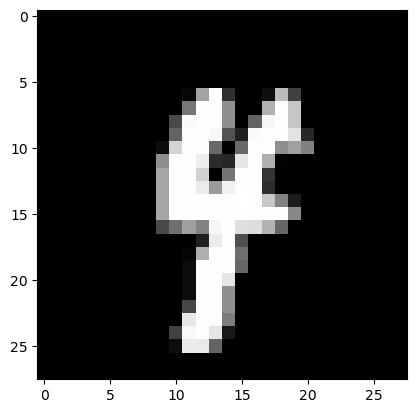

In [10]:
test_prediction(789, W1, b1, W2, b2)

Prediction:  [5]
Label:  5


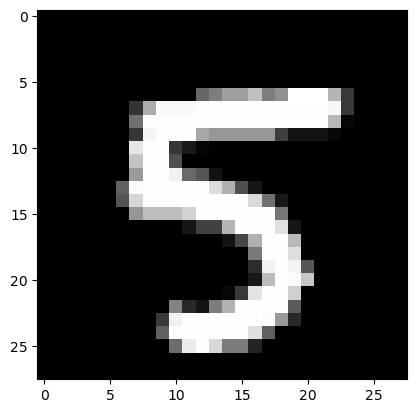

In [11]:
test_prediction(177, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(get_accuracy(dev_predictions, Y_dev))

[4 6 9 9 4 5 3 8 7 9 1 7 1 5 6 6 1 6 2 7 9 1 1 8 6 7 1 8 2 0 4 7 8 6 4 8 5
 2 3 0 4 7 1 9 7 0 2 1 7 0 3 5 3 5 1 7 0 3 2 3 5 5 8 9 5 5 5 5 7 1 7 2 3 8
 7 6 7 3 7 6 4 6 7 2 3 7 2 9 4 0 5 8 6 6 6 5 8 6 6 0 9 0 3 9 7 4 6 5 0 4 4
 2 6 4 0 1 7 2 9 2 1 7 4 5 1 6 4 6 2 5 4 6 2 8 8 9 0 3 5 1 5 8 5 0 4 1 0 5
 3 8 6 2 1 3 5 7 3 7 9 4 6 0 5 0 8 1 2 9 5 7 2 0 5 3 5 9 8 5 4 7 7 5 5 8 3
 5 9 5 4 2 2 5 2 3 5 3 2 2 3 7 7 1 2 1 7 8 8 4 2 3 0 1 8 8 1 7 1 6 5 4 3 0
 4 0 0 3 0 4 6 8 7 3 9 2 4 6 1 5 4 1 2 3 1 0 2 0 1 0 3 1 2 2 9 3 5 9 8 2 7
 9 5 4 5 4 6 5 3 9 6 4 8 2 6 6 5 1 3 9 7 1 1 0 6 0 7 1 7 0 9 6 7 4 9 1 5 8
 2 8 4 7 9 5 3 0 6 1 6 9 0 8 9 3 4 4 9 9 5 8 9 6 6 8 7 4 5 8 2 8 9 9 3 3 2
 6 1 3 4 0 3 2 9 1 9 4 2 9 2 7 8 5 6 8 4 9 8 1 8 0 2 0 2 7 8 3 9 2 1 3 8 9
 2 6 0 2 2 3 0 1 7 1 0 5 6 7 6 1 2 1 5 6 5 3 3 4 8 6 6 3 1 7 2 9 1 7 9 8 8
 0 4 3 3 9 2 4 7 3 1 4 5 5 7 7 4 7 0 0 1 0 7 9 1 2 0 2 9 9 3 3 0 8 4 5 7 9
 0 9 6 7 6 4 5 1 6 4 3 7 7 3 7 3 5 0 3 8 5 1 4 7 7 8 1 8 3 5 1 8 9 3 1 8 4
 1 4 4 0 0 9 3 4 4 4 6 5 

In [13]:
train_predictions = make_predictions(X_train, W1, b1, W2, b2)
print(get_accuracy(train_predictions, Y_train))

[8 2 7 ... 7 8 2] [8 3 7 ... 7 8 2]
0.94
